In [1]:
import numpy as np
from lib import plot
import IPython
from random import randint, randrange

paper = plot.A6_PORTRAIT

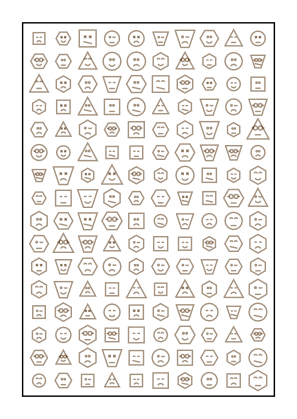

In [2]:
p_svg = plot.SVGPlotter('plots/choices.svg', paper)
p_hpgl = plot.HPGLPlotter(paper, 'plots/choices_{index}.hpgl')
plotter = plot.MultiPlotter()
plotter.register_plotter(p_svg)
plotter.register_plotter(p_hpgl)

plotter.move_to(paper.bottom_left())
plotter.line_to(paper.bottom_right())
plotter.line_to(paper.top_right())
plotter.line_to(paper.top_left())
plotter.line_to(paper.bottom_left())

plotter.add_layer([0.3, 0.15, 0, 0.5])

def face(head=0, mouth=0, eyes=0):
    yield None
    if head == 0:
        yield (-1, -1)
        yield (-1, 1)
        yield (1, 1)
        yield (1, -1)
        yield (-1, -1)
    elif head == 1:
        for i in np.linspace(0, 2 * np.pi, 7):
            yield(1.2 * np.cos(i), 1.2 * np.sin(i))
    elif head == 2:
        for i in np.linspace(0, 2 * np.pi, 7):
            yield(1.2 * np.sin(i), 1.2 * np.cos(i))
    elif head == 3:
        for i in np.linspace(0, 2 * np.pi, 17):
            yield(1.1 * np.cos(i), 1.1 * np.sin(i))
    elif head == 4:
        yield (-1.3, 1.1)
        yield (1.3, 1.1)
        yield (0, -1.3)
        yield (-1.3, 1.1)
    elif head == 5:
        yield (-1.2, -1.0)
        yield (1.2, -1.0)
        yield (0.5, 1.1)
        yield (-0.5, 1.1)
        yield (-1.2, -1.0)

    yield None
    if mouth == 0:
        yield (-0.3, 0.6)
        yield (0.3, 0.6)
    elif mouth == 1:
        yield (-0.45, 0.4)
        yield (0.45, 0.6)
    elif mouth == 2:
        for i in np.linspace(-0.3 * np.pi, 0.3 * np.pi, 17):
            yield(0.4 * np.sin(i), 0.4 * np.cos(i) + 0.2)
    elif mouth == 3:
        for i in np.linspace(-0.3 * np.pi, 0.3 * np.pi, 17):
            yield(0.4 * np.sin(i), -0.4 * np.cos(i) + 0.8)

    if eyes == 0:
        yield None
        yield (-0.4, -0.2)
        yield (-0.2, -0.2)
        yield None
        yield (0.4, -0.2)
        yield (0.2, -0.2)
    elif eyes == 1:
        yield None
        yield (-0.4, -0.3)
        yield (-0.2, -0.1)
        yield None
        yield (-0.4, -0.1)
        yield (-0.2, -0.3)
        yield None
        yield (0.4, -0.3)
        yield (0.2, -0.1)
        yield None
        yield (0.4, -0.1)
        yield (0.2, -0.3)
    elif eyes == 2:
        yield None
        for i in np.linspace(0, 2 * np.pi, 9):
            yield(0.25 * np.cos(i) - 0.3, 0.25 * np.sin(i) - 0.2)
        yield None
        for i in np.linspace(0, 2 * np.pi, 9):
            yield(0.25 * np.cos(i) + 0.3, 0.25 * np.sin(i) - 0.2)
        yield None
        yield (0.7, -0.2)
        yield (0.55, -0.2)
        yield None
        yield (-0.55, -0.2)
        yield (-0.7, -0.2)
    elif eyes == 3:
        yield None
        for i in np.linspace(0, 2 * np.pi, 9):
            yield(0.1 * np.cos(i) - 0.2, 0.1 * np.sin(i) - 0.2)
        yield None
        for i in np.linspace(0, 2 * np.pi, 9):
            yield(0.1 * np.cos(i) + 0.2, 0.1 * np.sin(i) - 0.2)
    elif eyes == 4:
        yield None
        for i in np.linspace(0, 2 * np.pi, 9):
            yield(0.1 * np.cos(i) - 0.3, 0.1 * np.sin(i) - 0.2)
        yield None
        for i in np.linspace(-0.3 * np.pi, 0.3 * np.pi, 17):
            yield(0.2 * np.sin(i) + 0.3, 0.1 * np.cos(i) - 0.25)
    elif eyes == 5:
        yield None
        for i in np.linspace(-0.3 * np.pi, 0.3 * np.pi, 17):
            yield(0.2 * np.sin(i) - 0.3, -0.2 * np.cos(i) - 0.2)
        yield None
        for i in np.linspace(-0.3 * np.pi, 0.3 * np.pi, 17):
            yield(0.2 * np.sin(i) + 0.3, -0.2 * np.cos(i) - 0.2)

size = 5
dist = 3
count_h = (paper.content_width - dist) // (size + dist)
count_v = (paper.content_height - dist) // (size + dist)
dist_h = (paper.content_width - dist) / count_h
dist_v = (paper.content_height - dist) / count_v

for xi in range(count_h):
    x = paper.centre()[0] + (xi - (count_h - 1) / 2) * dist_h
    for yi in range(count_v):
        y = paper.centre()[1] + (yi - (count_v - 1) / 2) * dist_v

        up = False

        head = randrange(6)
        mouth = randrange(4)
        eyes = randrange(6)
        scale = 1 + (0.5 - np.random.rand()) * 0.4
        for p in face(head, mouth, eyes):
            if p is None:
                up = True
                continue
            p = np.array(p) * size * scale / 2 + [x, y]
            if up:
                plotter.move_to(p)
                up = False
            else:
                plotter.line_to(p)

plotter.finalise()
IPython.display.SVG(filename=p_svg.file_name)